# Artificial Neural Network

# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

# Part 1 - Data Preprocessing
### Importing the dataset

In [2]:
dataset= pd.read_csv('forestfires.csv')
dataset.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [3]:
dataset=dataset.drop('month',axis=1)
dataset=dataset.drop('day',axis=1)

In [4]:
dataset

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [5]:
X= dataset.iloc[:,:-1].values
Y= dataset.iloc[:,-1].values

In [6]:
print(X)

[[ 86.2  26.2  94.3 ...   0.    0.    0. ]
 [ 90.6  35.4 669.1 ...   0.    1.    0. ]
 [ 90.6  43.7 686.9 ...   0.    1.    0. ]
 ...
 [ 81.6  56.7 665.6 ...   0.    0.    0. ]
 [ 94.4 146.  614.7 ...   0.    0.    0. ]
 [ 79.5   3.  106.7 ...   1.    0.    0. ]]


# Encoding categorical data

Label Encoding the "size_category" column

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y=le.fit_transform(Y)

In [8]:
print(Y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1
 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0
 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1
 0 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1
 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1
 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 0 1
 1 1 1 0 1 1 0 0 1 1 1 1 

# Splitting the dataset into the Training set and Test set

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=101)

## Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.fit_transform(X_test)

# Part 2 - Building the ANN
### Initializing the ANN

In [12]:
ann= tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [13]:
ann.add(tf.keras.layers.Dense(units=28, activation='relu'))

### Adding the second hidden layer

In [14]:
ann.add(tf.keras.layers.Dense(units=14, activation='relu'))

### Adding the output layer

In [15]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Part 3 - Training the ANN
### Compiling the ANN

In [16]:
ann.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

# Training the ANN on the Training set

In [17]:
history=ann.fit(X_train,y_train,batch_size=10,validation_split=0.30, epochs=40)

Epoch 1/40
26/26 [==============================] - 1s 9ms/step - loss: 0.6533 - accuracy: 0.6230 - val_loss: 0.6142 - val_accuracy: 0.7339
Epoch 2/40
26/26 [==============================] - 0s 2ms/step - loss: 0.6025 - accuracy: 0.7381 - val_loss: 0.6000 - val_accuracy: 0.7431
Epoch 3/40
26/26 [==============================] - 0s 2ms/step - loss: 0.5732 - accuracy: 0.7500 - val_loss: 0.5915 - val_accuracy: 0.7523
Epoch 4/40
26/26 [==============================] - 0s 2ms/step - loss: 0.5514 - accuracy: 0.7579 - val_loss: 0.5850 - val_accuracy: 0.7706
Epoch 5/40
26/26 [==============================] - 0s 2ms/step - loss: 0.5340 - accuracy: 0.7579 - val_loss: 0.5789 - val_accuracy: 0.7706
Epoch 6/40
26/26 [==============================] - 0s 2ms/step - loss: 0.5181 - accuracy: 0.7579 - val_loss: 0.5723 - val_accuracy: 0.7706
Epoch 7/40
26/26 [==============================] - 0s 2ms/step - loss: 0.5039 - accuracy: 0.7540 - val_loss: 0.5757 - val_accuracy: 0.7798
Epoch 8/40
26/26 [==

# Part 4 - Making the predictions and evaluating the model

### Predicting the Test set results

In [18]:
y_pred= ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]

In [19]:
scores = ann.evaluate(X, Y)
print("%s: %.2f%%" % (ann.metrics_names[1], scores[1]*100)) 

17/17 [==============================] - 0s 748us/step - loss: 5.9642 - accuracy: 0.6789
accuracy: 67.89%


# Making the Confusion Matrix

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 23  26]
 [  6 101]]


0.7948717948717948

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


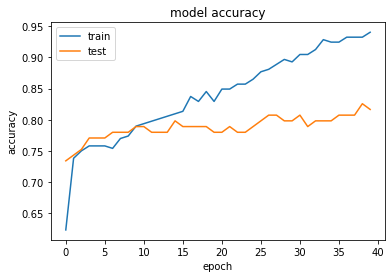

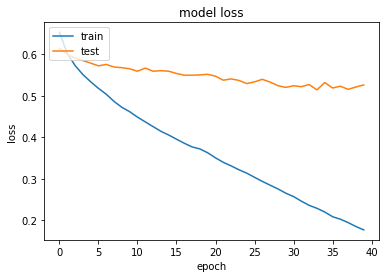

In [21]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Tuning of Hyperparameters :- Batch Size and Epochs

In [30]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from keras.optimizers import adam_v2
from keras.layers import Dropout
# create model
def create_model():
    model = Sequential()
    model.add(Dense(28, input_dim=28, kernel_initializer='random_uniform', activation='relu'))
    model.add(Dense(50, kernel_initializer='random_uniform', activation='relu'))
    model.add(Dense(40, kernel_initializer='random_uniform', activation='relu'))
    model.add(Dense(20, kernel_initializer='random_uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='random_uniform', activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
    return model

In [31]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,30,40]
epochs = [10,50,100,150]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_train,y_train) 

C:\Users\rahul\AppData\Local\Temp/ipykernel_36996/412275683.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn = create_model,verbose = 0)
C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START batch_size=10, epochs=10...................................
[CV 1/5; 1/16] END ....batch_size=10, epochs=10;, score=0.836 total time=   0.7s
[CV 2/5; 1/16] START batch_size=10, epochs=10...................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/16] END ....batch_size=10, epochs=10;, score=0.764 total time=   0.6s
[CV 3/5; 1/16] START batch_size=10, epochs=10...................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/16] END ....batch_size=10, epochs=10;, score=0.806 total time=   0.6s
[CV 4/5; 1/16] START batch_size=10, epochs=10...................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/16] END ....batch_size=10, epochs=10;, score=0.750 total time=   0.6s
[CV 5/5; 1/16] START batch_size=10, epochs=10...................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/16] END ....batch_size=10, epochs=10;, score=0.819 total time=   0.6s
[CV 1/5; 2/16] START batch_size=10, epochs=50...................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/16] END ....batch_size=10, epochs=50;, score=0.932 total time=   1.4s
[CV 2/5; 2/16] START batch_size=10, epochs=50...................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/16] END ....batch_size=10, epochs=50;, score=0.917 total time=   1.4s
[CV 3/5; 2/16] START batch_size=10, epochs=50...................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/16] END ....batch_size=10, epochs=50;, score=0.861 total time=   1.5s
[CV 4/5; 2/16] START batch_size=10, epochs=50...................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/16] END ....batch_size=10, epochs=50;, score=0.931 total time=   1.4s
[CV 5/5; 2/16] START batch_size=10, epochs=50...................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/16] END ....batch_size=10, epochs=50;, score=0.931 total time=   1.3s
[CV 1/5; 3/16] START batch_size=10, epochs=100..................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/16] END ...batch_size=10, epochs=100;, score=0.959 total time=   2.3s
[CV 2/5; 3/16] START batch_size=10, epochs=100..................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/16] END ...batch_size=10, epochs=100;, score=0.903 total time=   2.7s
[CV 3/5; 3/16] START batch_size=10, epochs=100..................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/16] END ...batch_size=10, epochs=100;, score=0.861 total time=   2.5s
[CV 4/5; 3/16] START batch_size=10, epochs=100..................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/16] END ...batch_size=10, epochs=100;, score=0.917 total time=   2.4s
[CV 5/5; 3/16] START batch_size=10, epochs=100..................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/16] END ...batch_size=10, epochs=100;, score=0.903 total time=   2.3s
[CV 1/5; 4/16] START batch_size=10, epochs=150..................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/16] END ...batch_size=10, epochs=150;, score=0.945 total time=   3.2s
[CV 2/5; 4/16] START batch_size=10, epochs=150..................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/16] END ...batch_size=10, epochs=150;, score=0.917 total time=   3.2s
[CV 3/5; 4/16] START batch_size=10, epochs=150..................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/16] END ...batch_size=10, epochs=150;, score=0.861 total time=   3.2s
[CV 4/5; 4/16] START batch_size=10, epochs=150..................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/16] END ...batch_size=10, epochs=150;, score=0.917 total time=   3.2s
[CV 5/5; 4/16] START batch_size=10, epochs=150..................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/16] END ...batch_size=10, epochs=150;, score=0.903 total time=   3.3s
[CV 1/5; 5/16] START batch_size=20, epochs=10...................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/16] END ....batch_size=20, epochs=10;, score=0.740 total time=   0.5s
[CV 2/5; 5/16] START batch_size=20, epochs=10...................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/16] END ....batch_size=20, epochs=10;, score=0.764 total time=   0.5s
[CV 3/5; 5/16] START batch_size=20, epochs=10...................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/16] END ....batch_size=20, epochs=10;, score=0.764 total time=   0.5s
[CV 4/5; 5/16] START batch_size=20, epochs=10...................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/16] END ....batch_size=20, epochs=10;, score=0.722 total time=   0.8s
[CV 5/5; 5/16] START batch_size=20, epochs=10...................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/16] END ....batch_size=20, epochs=10;, score=0.764 total time=   0.5s
[CV 1/5; 6/16] START batch_size=20, epochs=50...................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/16] END ....batch_size=20, epochs=50;, score=0.932 total time=   0.9s
[CV 2/5; 6/16] START batch_size=20, epochs=50...................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/16] END ....batch_size=20, epochs=50;, score=0.931 total time=   1.0s
[CV 3/5; 6/16] START batch_size=20, epochs=50...................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/16] END ....batch_size=20, epochs=50;, score=0.847 total time=   1.0s
[CV 4/5; 6/16] START batch_size=20, epochs=50...................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/16] END ....batch_size=20, epochs=50;, score=0.875 total time=   1.0s
[CV 5/5; 6/16] START batch_size=20, epochs=50...................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/16] END ....batch_size=20, epochs=50;, score=0.931 total time=   1.0s
[CV 1/5; 7/16] START batch_size=20, epochs=100..................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 7/16] END ...batch_size=20, epochs=100;, score=0.945 total time=   1.5s
[CV 2/5; 7/16] START batch_size=20, epochs=100..................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 7/16] END ...batch_size=20, epochs=100;, score=0.917 total time=   1.5s
[CV 3/5; 7/16] START batch_size=20, epochs=100..................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 7/16] END ...batch_size=20, epochs=100;, score=0.861 total time=   1.5s
[CV 4/5; 7/16] START batch_size=20, epochs=100..................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 7/16] END ...batch_size=20, epochs=100;, score=0.944 total time=   1.5s
[CV 5/5; 7/16] START batch_size=20, epochs=100..................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 7/16] END ...batch_size=20, epochs=100;, score=0.889 total time=   1.5s
[CV 1/5; 8/16] START batch_size=20, epochs=150..................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 8/16] END ...batch_size=20, epochs=150;, score=0.918 total time=   2.4s
[CV 2/5; 8/16] START batch_size=20, epochs=150..................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 8/16] END ...batch_size=20, epochs=150;, score=0.917 total time=   2.0s
[CV 3/5; 8/16] START batch_size=20, epochs=150..................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 8/16] END ...batch_size=20, epochs=150;, score=0.847 total time=   2.0s
[CV 4/5; 8/16] START batch_size=20, epochs=150..................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 8/16] END ...batch_size=20, epochs=150;, score=0.944 total time=   2.1s
[CV 5/5; 8/16] START batch_size=20, epochs=150..................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 8/16] END ...batch_size=20, epochs=150;, score=0.875 total time=   2.1s
[CV 1/5; 9/16] START batch_size=30, epochs=10...................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 9/16] END ....batch_size=30, epochs=10;, score=0.740 total time=   0.5s
[CV 2/5; 9/16] START batch_size=30, epochs=10...................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 9/16] END ....batch_size=30, epochs=10;, score=0.764 total time=   0.5s
[CV 3/5; 9/16] START batch_size=30, epochs=10...................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 9/16] END ....batch_size=30, epochs=10;, score=0.764 total time=   0.5s
[CV 4/5; 9/16] START batch_size=30, epochs=10...................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 9/16] END ....batch_size=30, epochs=10;, score=0.722 total time=   0.5s
[CV 5/5; 9/16] START batch_size=30, epochs=10...................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 9/16] END ....batch_size=30, epochs=10;, score=0.764 total time=   0.5s
[CV 1/5; 10/16] START batch_size=30, epochs=50..................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 10/16] END ...batch_size=30, epochs=50;, score=0.918 total time=   0.8s
[CV 2/5; 10/16] START batch_size=30, epochs=50..................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 10/16] END ...batch_size=30, epochs=50;, score=0.917 total time=   0.8s
[CV 3/5; 10/16] START batch_size=30, epochs=50..................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 10/16] END ...batch_size=30, epochs=50;, score=0.861 total time=   0.9s
[CV 4/5; 10/16] START batch_size=30, epochs=50..................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 10/16] END ...batch_size=30, epochs=50;, score=0.889 total time=   1.1s
[CV 5/5; 10/16] START batch_size=30, epochs=50..................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 10/16] END ...batch_size=30, epochs=50;, score=0.903 total time=   0.8s
[CV 1/5; 11/16] START batch_size=30, epochs=100.................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 11/16] END ..batch_size=30, epochs=100;, score=0.932 total time=   1.2s
[CV 2/5; 11/16] START batch_size=30, epochs=100.................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 11/16] END ..batch_size=30, epochs=100;, score=0.903 total time=   1.2s
[CV 3/5; 11/16] START batch_size=30, epochs=100.................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 11/16] END ..batch_size=30, epochs=100;, score=0.861 total time=   1.2s
[CV 4/5; 11/16] START batch_size=30, epochs=100.................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 11/16] END ..batch_size=30, epochs=100;, score=0.903 total time=   1.2s
[CV 5/5; 11/16] START batch_size=30, epochs=100.................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 11/16] END ..batch_size=30, epochs=100;, score=0.903 total time=   1.2s
[CV 1/5; 12/16] START batch_size=30, epochs=150.................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 12/16] END ..batch_size=30, epochs=150;, score=0.918 total time=   1.6s
[CV 2/5; 12/16] START batch_size=30, epochs=150.................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 12/16] END ..batch_size=30, epochs=150;, score=0.917 total time=   1.5s
[CV 3/5; 12/16] START batch_size=30, epochs=150.................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 12/16] END ..batch_size=30, epochs=150;, score=0.847 total time=   1.5s
[CV 4/5; 12/16] START batch_size=30, epochs=150.................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 12/16] END ..batch_size=30, epochs=150;, score=0.931 total time=   1.7s
[CV 5/5; 12/16] START batch_size=30, epochs=150.................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 12/16] END ..batch_size=30, epochs=150;, score=0.861 total time=   1.7s
[CV 1/5; 13/16] START batch_size=40, epochs=10..................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 13/16] END ...batch_size=40, epochs=10;, score=0.740 total time=   0.8s
[CV 2/5; 13/16] START batch_size=40, epochs=10..................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 13/16] END ...batch_size=40, epochs=10;, score=0.764 total time=   0.5s
[CV 3/5; 13/16] START batch_size=40, epochs=10..................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 13/16] END ...batch_size=40, epochs=10;, score=0.764 total time=   0.5s
[CV 4/5; 13/16] START batch_size=40, epochs=10..................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 13/16] END ...batch_size=40, epochs=10;, score=0.722 total time=   0.5s
[CV 5/5; 13/16] START batch_size=40, epochs=10..................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 13/16] END ...batch_size=40, epochs=10;, score=0.764 total time=   0.5s
[CV 1/5; 14/16] START batch_size=40, epochs=50..................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 14/16] END ...batch_size=40, epochs=50;, score=0.904 total time=   0.7s
[CV 2/5; 14/16] START batch_size=40, epochs=50..................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 14/16] END ...batch_size=40, epochs=50;, score=0.875 total time=   0.9s
[CV 3/5; 14/16] START batch_size=40, epochs=50..................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 14/16] END ...batch_size=40, epochs=50;, score=0.861 total time=   0.8s
[CV 4/5; 14/16] START batch_size=40, epochs=50..................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 14/16] END ...batch_size=40, epochs=50;, score=0.889 total time=   0.8s
[CV 5/5; 14/16] START batch_size=40, epochs=50..................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 14/16] END ...batch_size=40, epochs=50;, score=0.903 total time=   0.7s
[CV 1/5; 15/16] START batch_size=40, epochs=100.................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 15/16] END ..batch_size=40, epochs=100;, score=0.918 total time=   1.1s
[CV 2/5; 15/16] START batch_size=40, epochs=100.................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 15/16] END ..batch_size=40, epochs=100;, score=0.917 total time=   1.2s
[CV 3/5; 15/16] START batch_size=40, epochs=100.................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 15/16] END ..batch_size=40, epochs=100;, score=0.847 total time=   1.1s
[CV 4/5; 15/16] START batch_size=40, epochs=100.................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 15/16] END ..batch_size=40, epochs=100;, score=0.931 total time=   1.4s
[CV 5/5; 15/16] START batch_size=40, epochs=100.................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 15/16] END ..batch_size=40, epochs=100;, score=0.875 total time=   1.0s
[CV 1/5; 16/16] START batch_size=40, epochs=150.................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 16/16] END ..batch_size=40, epochs=150;, score=0.918 total time=   1.5s
[CV 2/5; 16/16] START batch_size=40, epochs=150.................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 16/16] END ..batch_size=40, epochs=150;, score=0.903 total time=   1.5s
[CV 3/5; 16/16] START batch_size=40, epochs=150.................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 16/16] END ..batch_size=40, epochs=150;, score=0.847 total time=   1.4s
[CV 4/5; 16/16] START batch_size=40, epochs=150.................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 16/16] END ..batch_size=40, epochs=150;, score=0.944 total time=   1.6s
[CV 5/5; 16/16] START batch_size=40, epochs=150.................................


C:\Users\rahul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 16/16] END ..batch_size=40, epochs=150;, score=0.889 total time=   1.7s


In [32]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param)) 

Best : 0.9140791654586792, using {'batch_size': 10, 'epochs': 50}
0.7949010610580445,0.032715422976460386 with: {'batch_size': 10, 'epochs': 10}
0.9140791654586792,0.02705172939717321 with: {'batch_size': 10, 'epochs': 50}
0.9084474921226502,0.0313638256391776 with: {'batch_size': 10, 'epochs': 100}
0.9084855437278747,0.02741944437928528 with: {'batch_size': 10, 'epochs': 150}
0.7507229804992676,0.017048468307721335 with: {'batch_size': 20, 'epochs': 10}
0.9029680490493774,0.03528857841365745 with: {'batch_size': 20, 'epochs': 50}
0.9112633109092713,0.032551833791946955 with: {'batch_size': 20, 'epochs': 100}
0.9002283096313477,0.03458454148594112 with: {'batch_size': 20, 'epochs': 150}
0.7507229804992676,0.017048468307721335 with: {'batch_size': 30, 'epochs': 10}
0.8974505424499511,0.02100443740699084 with: {'batch_size': 30, 'epochs': 50}
0.900190269947052,0.022485535546847676 with: {'batch_size': 30, 'epochs': 100}
0.8946727633476257,0.03371794603691428 with: {'batch_size': 30, 'epo

# Tuning of Hyperparameters :- All at once

In [33]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam 
from sklearn.metrics import classification_report, accuracy_score
from keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 8,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['acc'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0)

# Define the grid search parameters

batch_size = [10,20,40]
epochs = [10,50,100]
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']
neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,dropout_rate = dropout_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_train,y_train)

In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_ ,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param)) 